In [1]:
import os
import torch
import warnings
import matplotlib
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import seaborn as sns
from scipy import stats
from pathlib import Path
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from scipy.io import mmread, mmwrite
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
from matplotlib.legend_handler import HandlerPatch
from scipy.sparse import csr_matrix, coo_matrix, csc_matrix

warnings.filterwarnings("ignore")
matplotlib.rcParams.update(matplotlib.rcParamsDefault)


def jump_up_one_dir():
    new_dir = Path().resolve().parent
    os.chdir(new_dir)
    print("✅ 当前工作目录跳转至:", new_dir)

jump_up_one_dir()

✅ 当前工作目录跳转至: C:\Users\Jeming\Desktop\子刊项目\T0


In [2]:

font_path = './set word/Arial/Arial.ttf'  # 需要修改
fm.fontManager.addfont(font_path)
print("✅ 字体已添加:", font_path)

# 设置全局字体为 Arial
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18 
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'

✅ 字体已添加: ./set word/Arial/Arial.ttf


### 图1：pcc柱状图（原始最初版本）可以不改这个

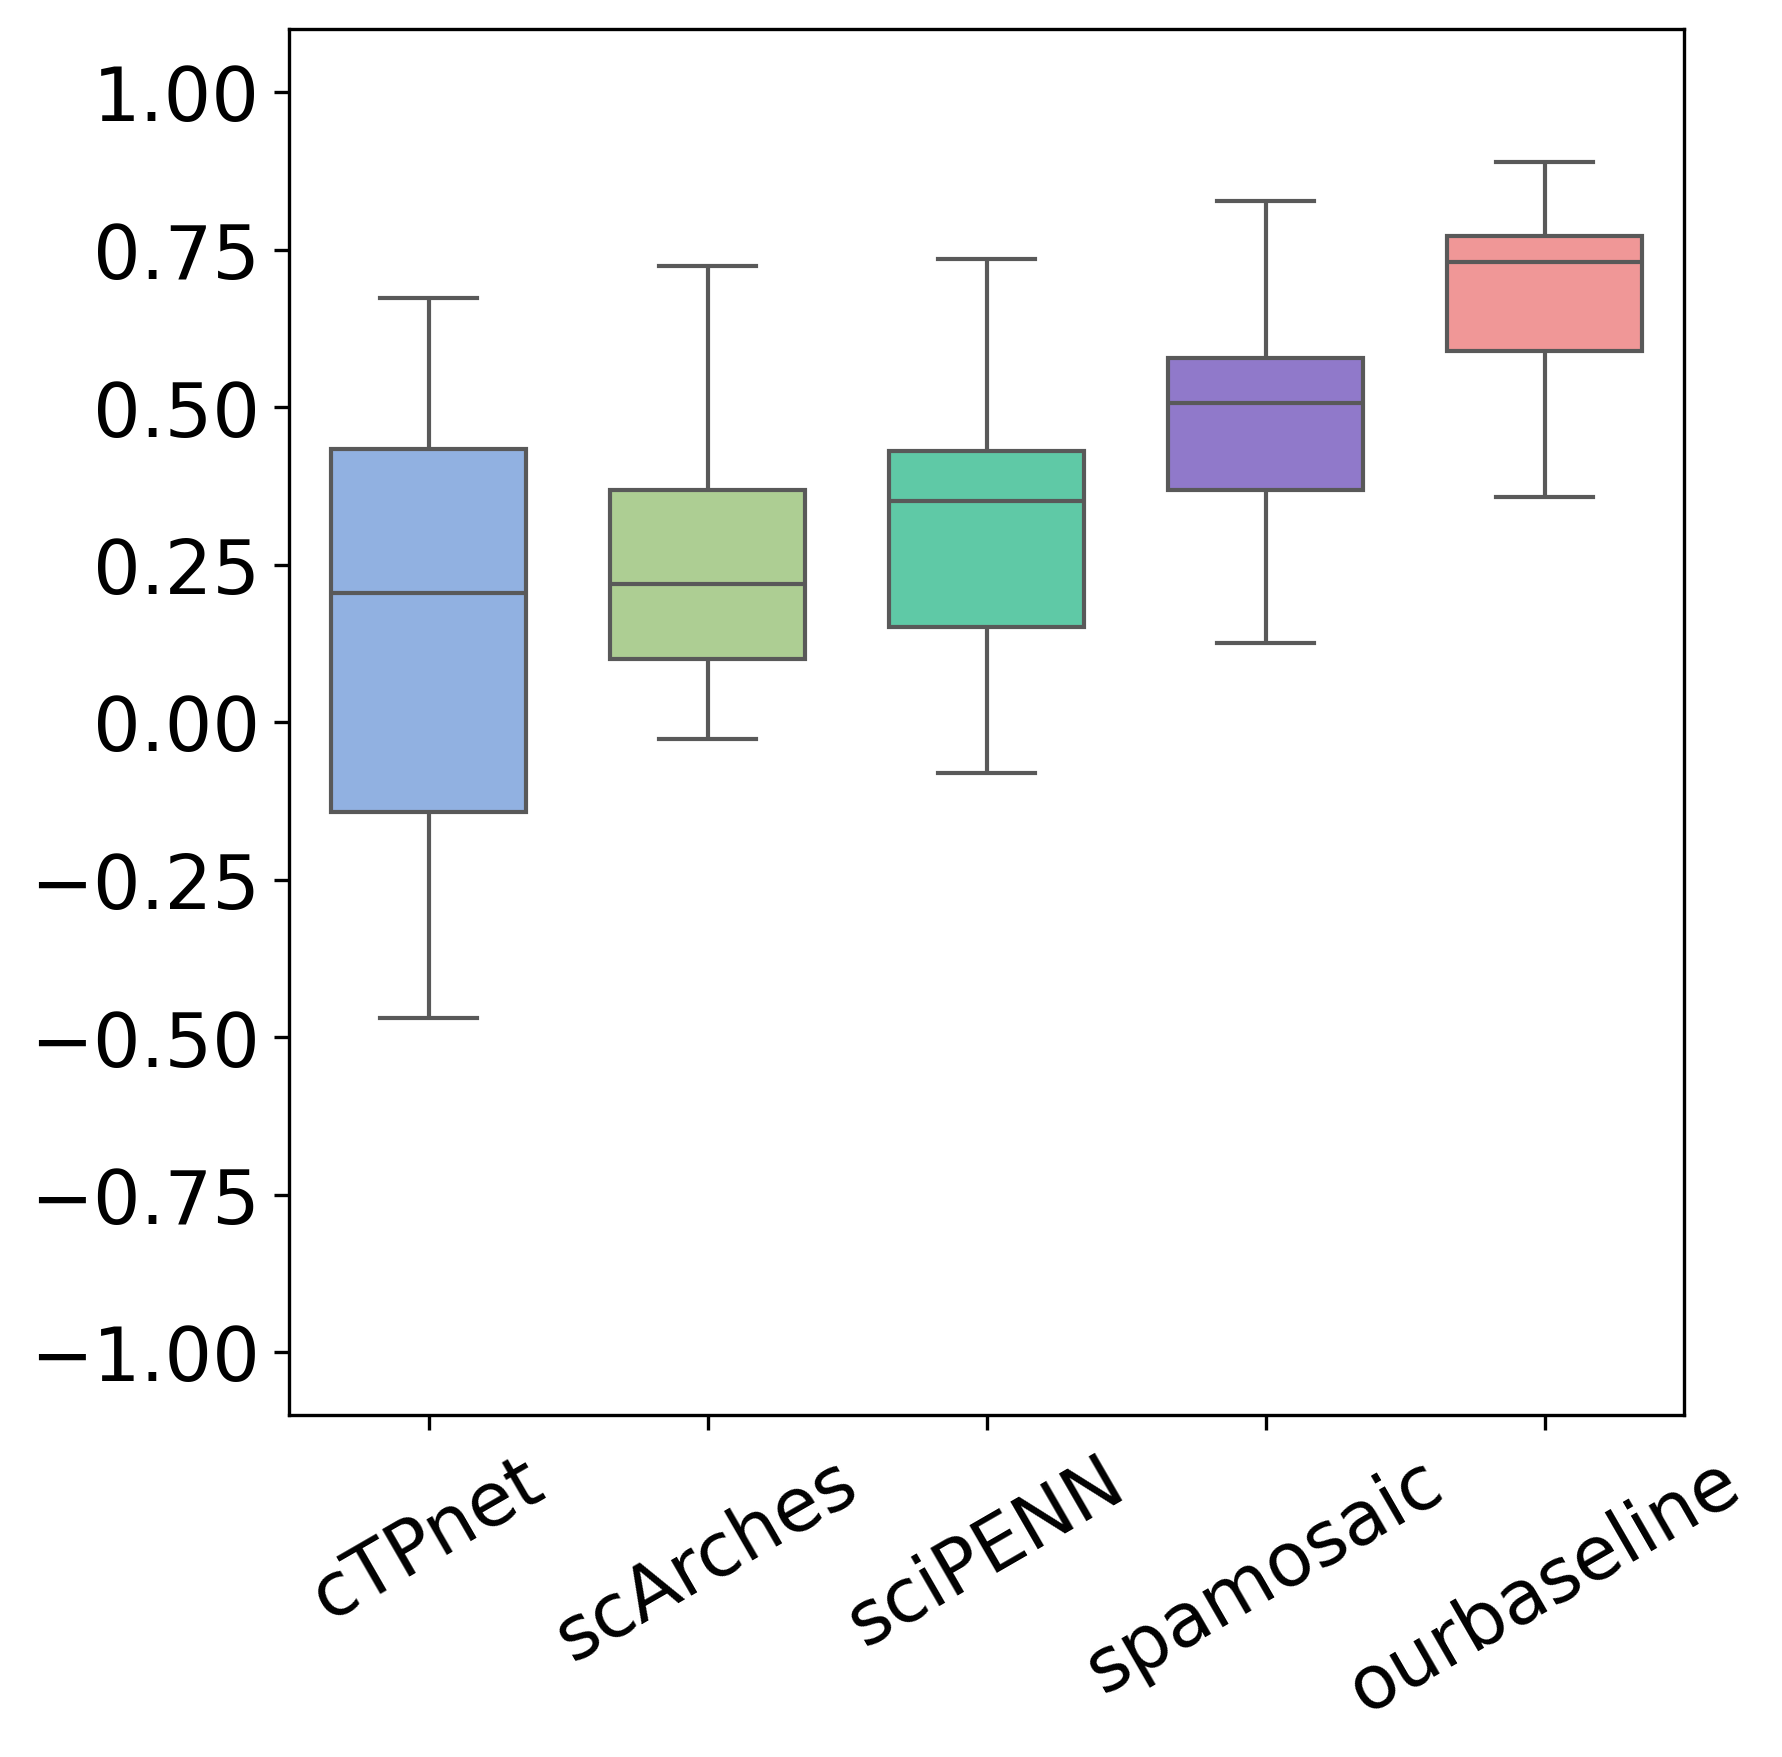

In [ ]:
# my_pal = {'totalVI':'#E6D885','scArches':'#F1C67F','Dengkw':'#E7A365','scMoGNN':'#EE9185','CMAE':'#E2A6C0','BABEL':'#BEABCB','Seurat':'#7DC9C4','sciPENN':'#84a4e8','Liger':'#65AADD','cTp_net':'#7CC38A','scVAEIT':'c'}
# old：my_pal = {'cTPnet':'#E6D885','scArches':'#F1C67F','sciPENN':'#84a4e8','spamosaic':'#EE9185','ourbaseline':'#7DC9C4'}

# new: # 创建一个颜色字典，为每个方法指定颜色   "#88c4d7、#d0ead5、#b5e2e5、#9793c6、#e6c7df、#f79691  "
# my_pal = {'cTPnet':'#88c4d7','scArches':'#d0ead5','sciPENN':'#b5e2e5','spamosaic':'#9793c6','ourbaseline':'#f79691'}

my_pal = {
    'cTPnet':'#84aeee',
    'scArches':'#acd889',
    'sciPENN':'#4edaac',
    'spamosaic':"#8a6cd7",
    'ourbaseline':'#ff8888'
    }


PCCs_protein = pd.read_csv('./2-impute/S1-pcc_protein.csv')
PCCs_protein = PCCs_protein.set_index('Unnamed: 0').T
# 设置字体
font = {'family': 'DejaVu Sans', 'weight': 'normal', 'size': 18}
plt.rc('font', **font)
# 绘制垂直箱线图
plt.figure(figsize=(6, 6), dpi=300)
fig1 = sns.boxplot(data=PCCs_protein, orient="v", linewidth=1, width=0.7, palette=my_pal, fliersize=0, flierprops={'marker': 'o'})
# 设置坐标轴标签
fig1.set_ylabel("")
fig1.set_xlabel("")
# 设置坐标轴范围
fig1.set_ylim(-1.1, 1.1)
# # 去掉顶部和右侧边框
# fig1.spines['top'].set_visible(False)
# fig1.spines['right'].set_visible(False)
plt.xticks(rotation=30)  # 旋转x轴刻度标签
# 设置标题
plt.title("", fontdict={'size': 18})
# 显示图形
plt.show()

### 图2：pcc柱状图-进阶版（需要修改）

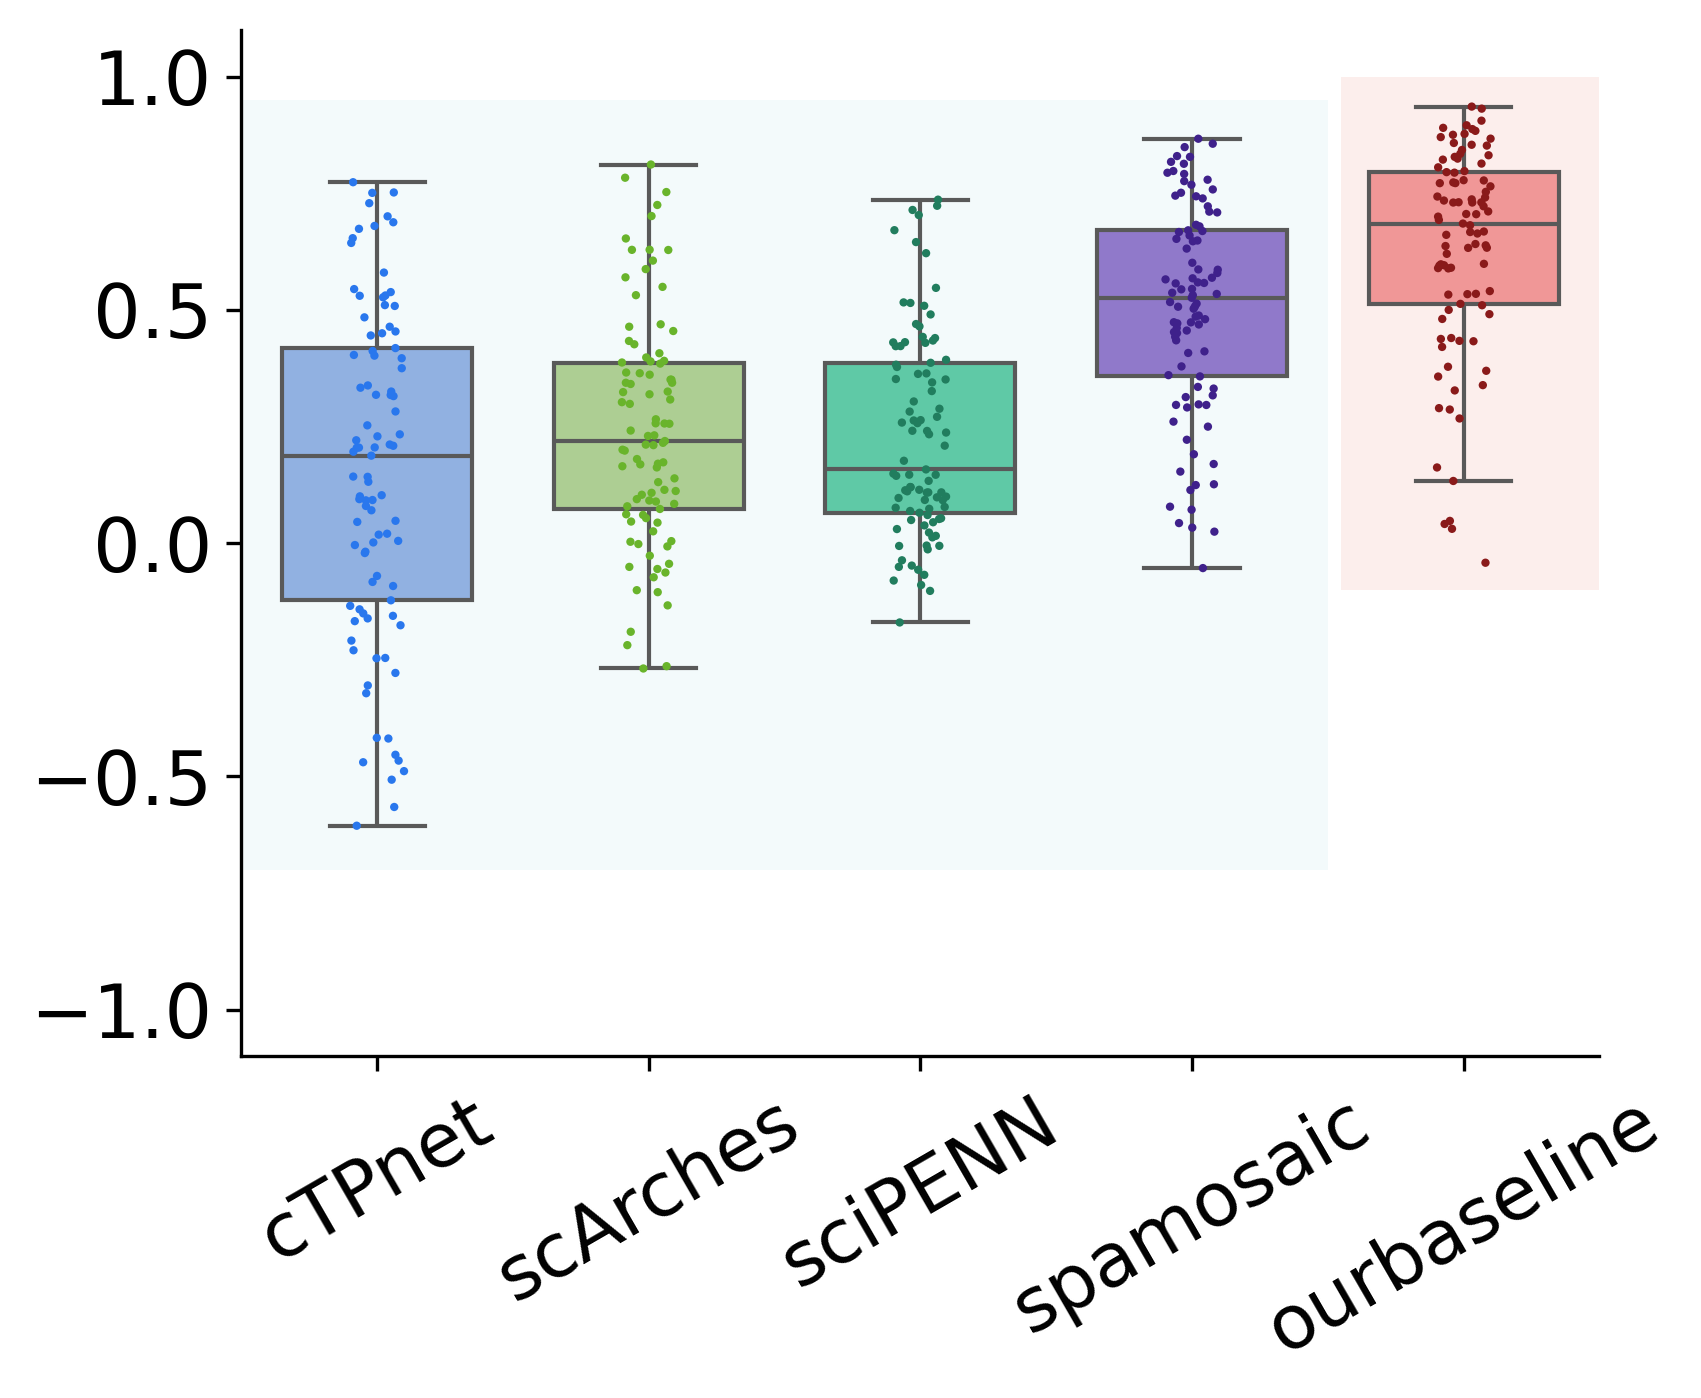

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle  # 导入 Rectangle 类

# 定义颜色映射
# my_pal = {'cTPnet': '#E6D885', 'scArches': '#F1C67F', 'sciPENN': '#84a4e8', 'spamosaic': '#EE9185', 'ourbaseline': '#7DC9C4'}

my_pal = {
    'cTPnet':'#84aeee',
    'scArches':'#acd889',
    'sciPENN':'#4edaac',
    'spamosaic':"#8a6cd7",
    'ourbaseline':'#ff8888'
    }
# 定义散点颜色
my_sopt_pal = {
    'cTPnet':"#2977ed",
    'scArches':"#69b42b",
    'sciPENN':"#217d5e",
    'spamosaic':"#3f218b",
    'ourbaseline':"#8a1a1a"
    }

# 文件路径
# 加载多个 CSV 文件
file_names = ['./2-impute/S1-pcc_protein.csv', './2-impute/S2-pcc_protein.csv', './2-impute/S3-pcc_protein.csv']
data_frames = []

for file_name in file_names:
    df = pd.read_csv(file_name)
    df = df.set_index('Unnamed: 0').T  # 转置并设置索引
    data_frames.append(df)

# 合并所有数据到一个 DataFrame
PCCs_protein_all = pd.concat(data_frames, axis=0)

# 设置字体
font = {'family': 'DejaVu Sans', 'weight': 'normal', 'size': 18}
plt.rc('font', **font)

# 绘制垂直箱线图和散点图
plt.figure(figsize=(6, 5), dpi=300)

# 绘制箱线图
sns.boxplot(data=PCCs_protein_all, orient="v", linewidth=1, width=0.7, palette=my_pal, fliersize=0)

## 绘制散点图
# sns.stripplot(data=PCCs_protein_all, orient="v", linewidth=1, color='black', edgecolor='None', size=2, jitter=True, dodge=True)

sns.stripplot(data=PCCs_protein_all, orient="v", linewidth=1, palette=my_sopt_pal, edgecolor='None', size=2, jitter=True, dodge=False)


# 设置坐标轴标签
plt.ylabel("")
plt.xlabel("")

# 设置坐标轴范围
plt.ylim(-1.1, 1.1)

# 去掉顶部和右侧边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 设置标题
plt.title("", fontdict={'size': 18})

# 添加两个颜色的框
ax = plt.gca()
# 浅蓝色框
ax.add_patch(Rectangle((-0.5, -0.7), 4, 1.65, facecolor='#b5e2e5', alpha=0.15, edgecolor='none', zorder=0))
# 浅灰色框
ax.add_patch(Rectangle((3.55, -0.1), 4, 1.1, facecolor='#EE9185', alpha=0.15, edgecolor='none', zorder=0))

# # 显示图例
# plt.legend(title='Methods', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.xticks(rotation=30)  # 旋转x轴刻度标签

# 显示图形
plt.tight_layout()
plt.show()

### 图3：spcc柱状图-进阶版（需要修改）

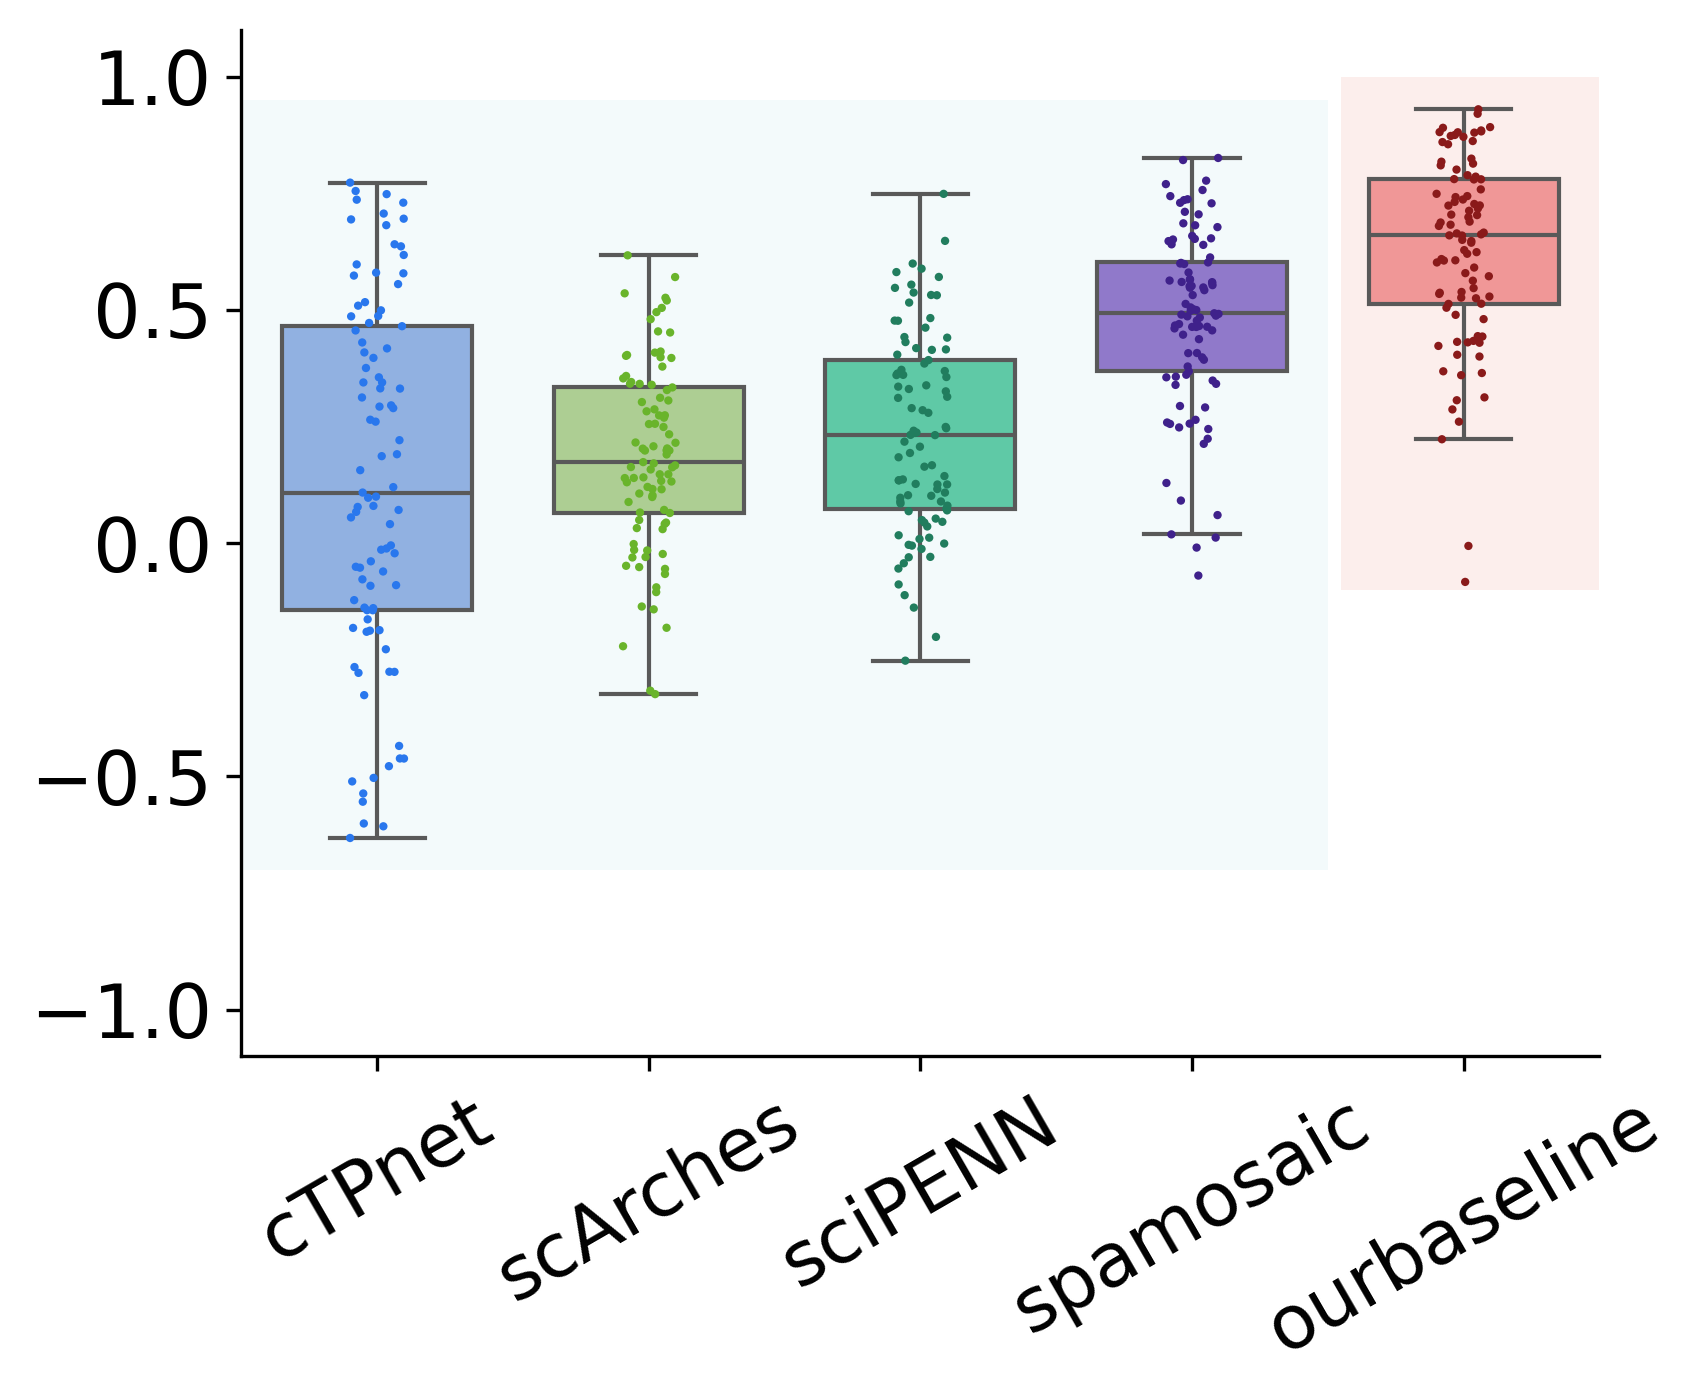

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 定义颜色映射
# my_pal = {'cTPnet': '#E6D885', 'scArches': '#F1C67F', 'sciPENN': '#84a4e8', 'spamosaic': '#EE9185', 'ourbaseline': '#7DC9C4'}
my_pal = {
    'cTPnet':'#84aeee',
    'scArches':'#acd889',
    'sciPENN':'#4edaac',
    'spamosaic':"#8a6cd7",
    'ourbaseline':'#ff8888'
    }
# 定义散点颜色
my_sopt_pal = {
    'cTPnet':"#2977ed",
    'scArches':"#69b42b",
    'sciPENN':"#217d5e",
    'spamosaic':"#3f218b",
    'ourbaseline':"#8a1a1a"
    }

# 文件路径

# 加载多个 CSV 文件
file_names = ['./2-impute/S1-spcc_protein.csv', './2-impute/S2-spcc_protein.csv', './2-impute/S3-spcc_protein.csv']
data_frames = []

for file_name in file_names:
    df = pd.read_csv(file_name)
    df = df.set_index('Unnamed: 0').T  # 转置并设置索引
    data_frames.append(df)

# 合并所有数据到一个 DataFrame
PCCs_protein_all = pd.concat(data_frames, axis=0)

# 设置字体
font = {'family': 'DejaVu Sans', 'weight': 'normal', 'size': 18}
plt.rc('font', **font)

# 绘制垂直箱线图和散点图
plt.figure(figsize=(6, 5), dpi=300)

# 绘制箱线图
sns.boxplot(
    data=PCCs_protein_all,    orient="v",    linewidth=1,
    width=0.7,    palette=my_pal,    fliersize=0
)

# 绘制散点图
# sns.stripplot(
#     data=PCCs_protein_all,   orient="v",    linewidth=1,    color='black', edgecolor='None',
#     size=2,    jitter=True,    dodge=True  
# )
sns.stripplot(data=PCCs_protein_all, orient="v", linewidth=1, palette=my_sopt_pal, edgecolor='None', size=2, jitter=True, dodge=False)

# 设置坐标轴标签
plt.ylabel("")
plt.xlabel("")

# 设置坐标轴范围
plt.ylim(-1.1, 1.1)

# 去掉顶部和右侧边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 添加两个颜色的框
ax = plt.gca()
# 浅蓝色框
ax.add_patch(Rectangle((-0.5, -0.7), 4, 1.65, facecolor='#b5e2e5', alpha=0.15, edgecolor='none', zorder=0))
# 浅灰色框
ax.add_patch(Rectangle((3.55, -0.1), 4, 1.1, facecolor='#EE9185', alpha=0.15, edgecolor='none', zorder=0))

# 设置标题
plt.title("", fontdict={'size': 18})

# # 显示图例
# plt.legend(title='Methods', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=30)  # 旋转x轴刻度标签

# 显示图形
plt.tight_layout()
plt.show()

### 图4：PCC-SPCC坐标图（具体修改等待会议）

Columns after groupby and agg for pcc: Index(['cTPnet_pcc_median', 'cTPnet_pcc_min', 'cTPnet_pcc_max',
       'scArches_pcc_median', 'scArches_pcc_min', 'scArches_pcc_max',
       'sciPENN_pcc_median', 'sciPENN_pcc_min', 'sciPENN_pcc_max',
       'spamosaic_pcc_median', 'spamosaic_pcc_min', 'spamosaic_pcc_max',
       'ourbaseline_pcc_median', 'ourbaseline_pcc_min', 'ourbaseline_pcc_max'],
      dtype='object')
Columns after groupby and agg for spcc: Index(['cTPnet_spcc_median', 'cTPnet_spcc_min', 'cTPnet_spcc_max',
       'scArches_spcc_median', 'scArches_spcc_min', 'scArches_spcc_max',
       'sciPENN_spcc_median', 'sciPENN_spcc_min', 'sciPENN_spcc_max',
       'spamosaic_spcc_median', 'spamosaic_spcc_min', 'spamosaic_spcc_max',
       'ourbaseline_spcc_median', 'ourbaseline_spcc_min',
       'ourbaseline_spcc_max'],
      dtype='object')


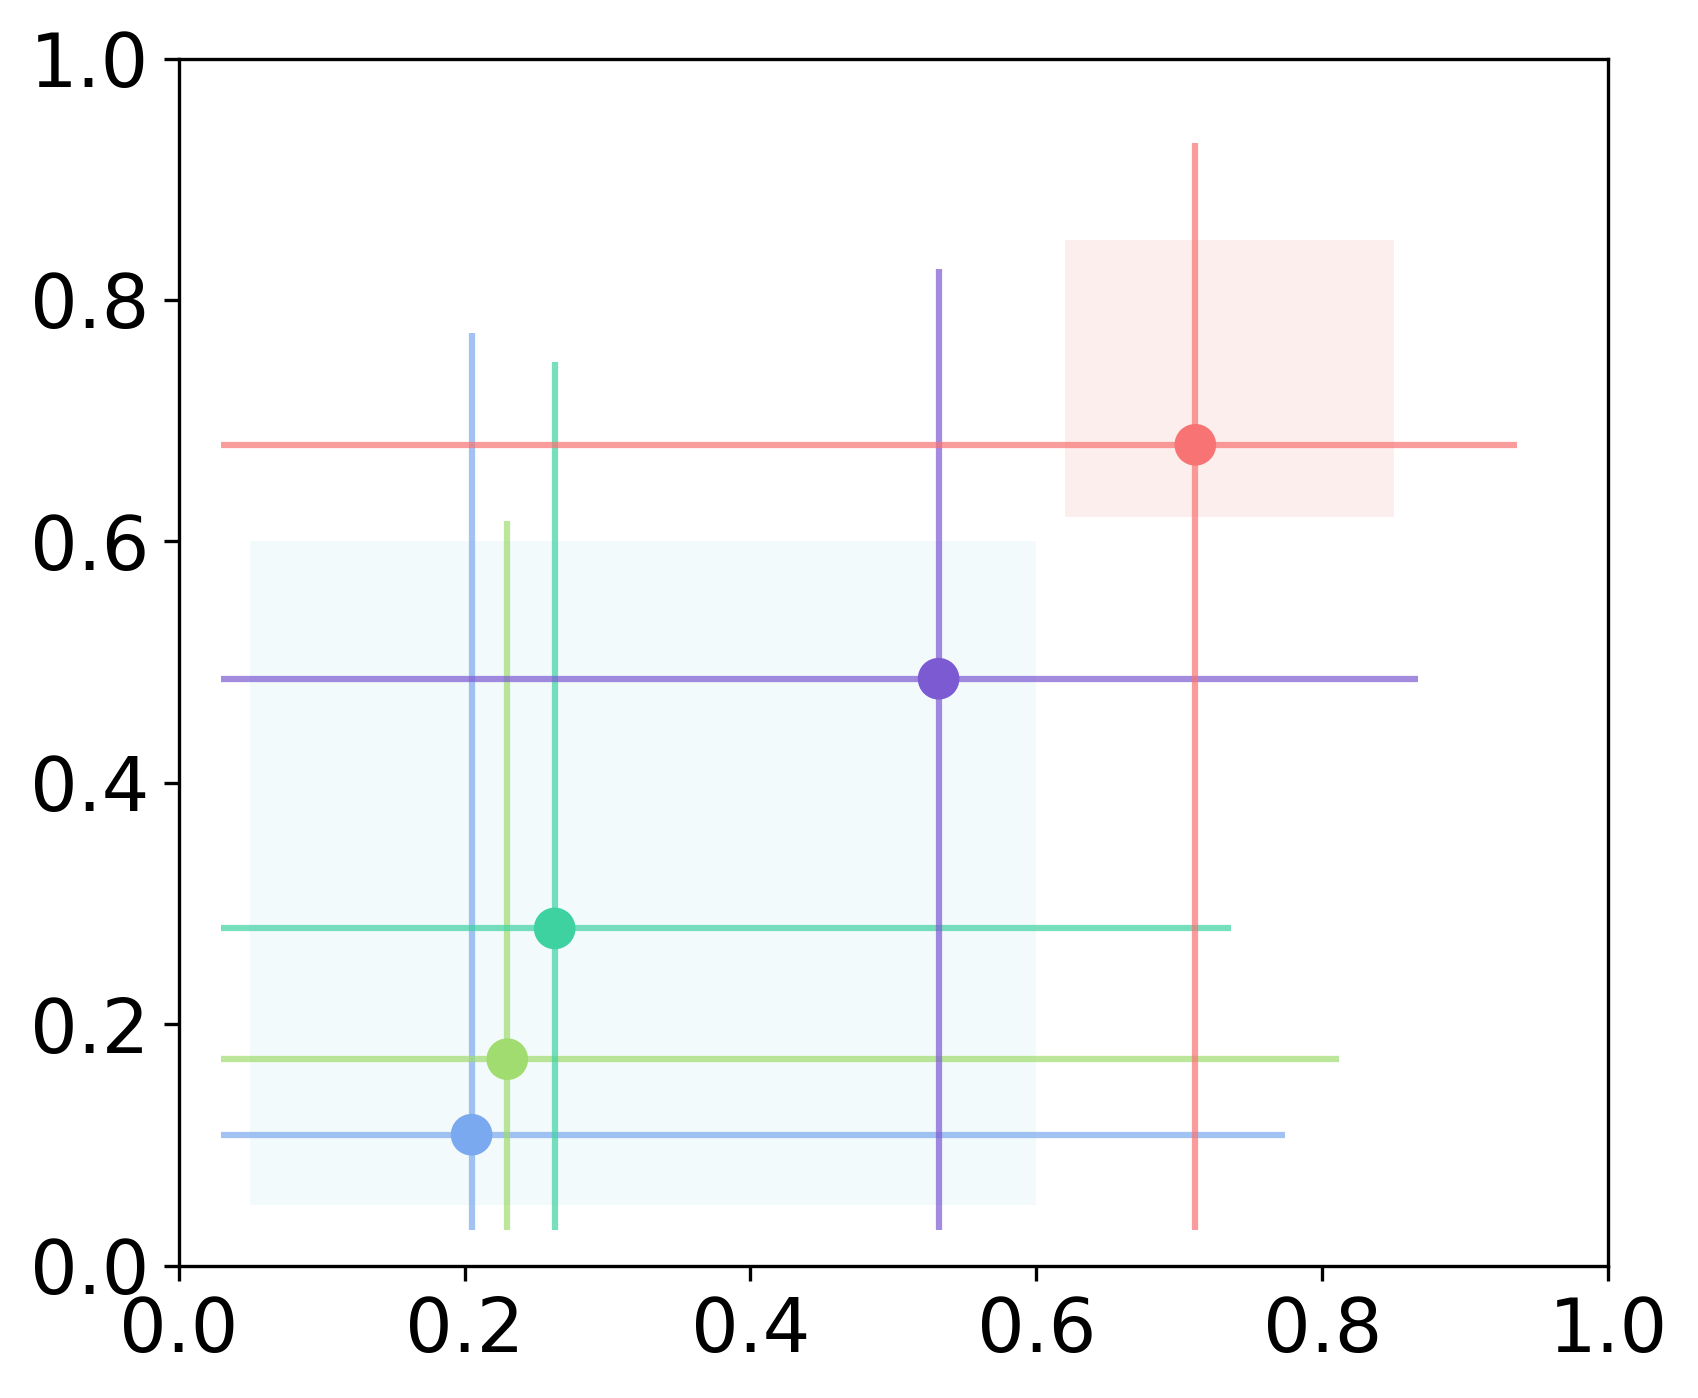

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 定义颜色映射（确保包含所有方法名）
# my_pal = {
#     'cTPnet': '#88c4d7',
#     'scArches': '#d0ead5',
#     'sciPENN': '#b5e2e5',
#     'spamosaic': '#9793c6',
#     'ourbaseline': '#f79691'
# }

my_pal = {
    'cTPnet':"#7ba9ef",
    'scArches':"#a0dc6f",
    'sciPENN':"#3fd2a1",
    'spamosaic':"#7c5ad2",
    'ourbaseline':"#f87373"
    }

# 文件路径

# 加载并处理数据（修复列名问题）
def load_and_process(files, suffix):
    data_frames = []
    for file in files:
        df = pd.read_csv(file)
        df = df.set_index('Unnamed: 0').T
        df.columns.name = 'Method'  # 设置列名为方法名
        # 添加一个名为 'Method' 的列，包含方法名
        df['Method'] = df.index
        data_frames.append(df)
    combined = pd.concat(data_frames)
    
    # 按方法名分组计算统计量
    stats = combined.groupby('Method').agg(['median', 'min', 'max'])

    # 重新生成列名
    stats.columns = [f'{col[0]}_{suffix}_{col[1]}' for col in stats.columns]
    
    # 打印列名以检查生成的列名
    print(f"Columns after groupby and agg for {suffix}: {stats.columns}")
    
    return stats

# 处理PCC数据
pcc_stats = load_and_process(['./2-impute/S1-pcc_protein.csv', './2-impute/S2-pcc_protein.csv', './2-impute/S3-pcc_protein.csv'], 'pcc')
# 处理SPCC数据
spcc_stats = load_and_process(['./2-impute/S1-spcc_protein.csv', './2-impute/S2-spcc_protein.csv', './2-impute/S3-spcc_protein.csv'], 'spcc')

# 合并统计量
merged_stats = pd.concat([pcc_stats, spcc_stats], axis=1)

# 提取正确的方法列表
methods = list(my_pal.keys())  # 直接使用颜色映射中的方法名

# 设置画布
plt.figure(figsize=(6, 5), dpi=300)
font = {'family': 'DejaVu Sans', 'size': 18}
plt.rc('font', **font)

# 绘制每个方法的散点图和范围线
for method in methods:
    # 提取统计量
    pcc_median = merged_stats[f'{method}_pcc_median'].median()
    pcc_min = merged_stats[f'{method}_pcc_min'].min()
    pcc_max = merged_stats[f'{method}_pcc_max'].max()
        
    spcc_median = merged_stats[f'{method}_spcc_median'].median()
    spcc_min = merged_stats[f'{method}_spcc_min'].min()
    spcc_max = merged_stats[f'{method}_spcc_max'].max()
   
    # 确保最小值不小于0.05
    pcc_min = max(pcc_min, 0.03)
    spcc_min = max(spcc_min, 0.03)
    
    # 绘制范围线
    plt.hlines(y=spcc_median, xmin=pcc_min, xmax=pcc_max, 
               color=my_pal[method], lw=1.5, alpha=0.7)
    plt.vlines(x=pcc_median, ymin=spcc_min, ymax=spcc_max, 
               color=my_pal[method], lw=1.5, alpha=0.7)
    
    # 绘制散点
    plt.scatter(pcc_median, spcc_median, 
                color=my_pal[method], s=100, edgecolor='None', 
                label=method, zorder=3)


# 添加两个颜色的框
ax = plt.gca()
# 浅蓝色框
ax.add_patch(Rectangle((0.05, 0.05), 0.55, 0.55, facecolor='#b5e2e5', alpha=0.15, edgecolor='none', zorder=0))
# 浅灰色框
ax.add_patch(Rectangle((0.62, 0.62), 0.23, 0.23, facecolor='#EE9185', alpha=0.15, edgecolor='none', zorder=0))
# 注意：由于坐标轴范围被限制在 [0, 1]，实际绘制时：矩形右侧会超出范围：0.62 + 0.7 = 1.32 > 1.0；矩形顶部会超出范围：0.62 + 0.7 = 1.32 > 1.0

# # 美化图表(设置刻度范围)
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('', fontsize=18)
plt.ylabel('', fontsize=18)
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()